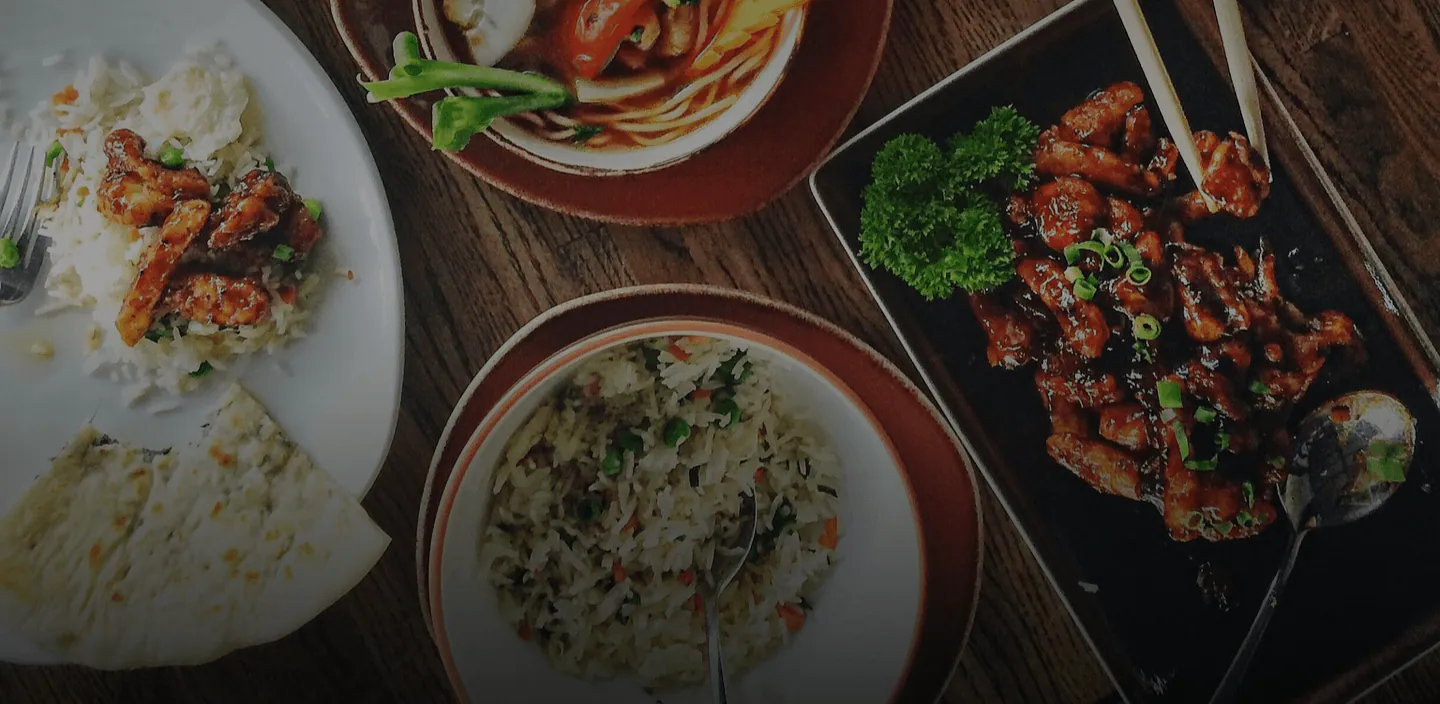

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
sns.set_style('whitegrid')
import matplotlib.colors as mccolors

In [2]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

import os
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from geopy.geocoders import Nominatim


Output hidden; open in https://colab.research.google.com to view.

In [3]:
import dexplot as dxp
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from tqdm import  tqdm
import string

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Zomato Restaurant Analysis/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
print('checking the Null od NAN Percentage')
((df.isnull() | df.isna()).sum()*100 / df.index.size)

checking the Null od NAN Percentage


url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [11]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

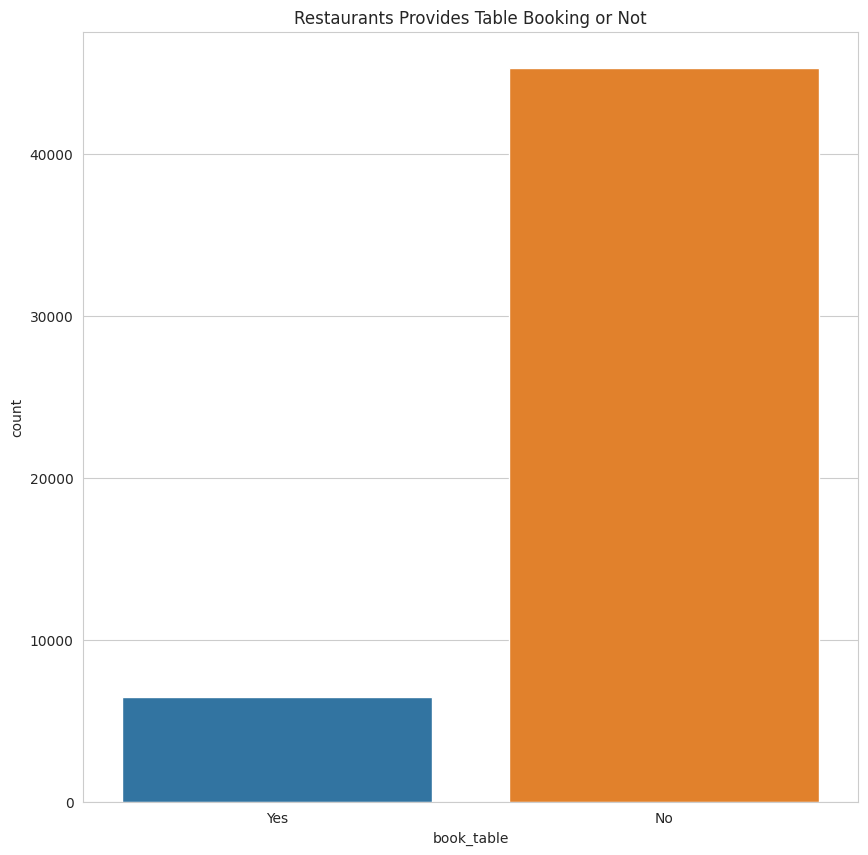

In [12]:
sns.countplot(data = df,x =df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants Provides Table Booking or Not')
plt.show()

In [13]:
df['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

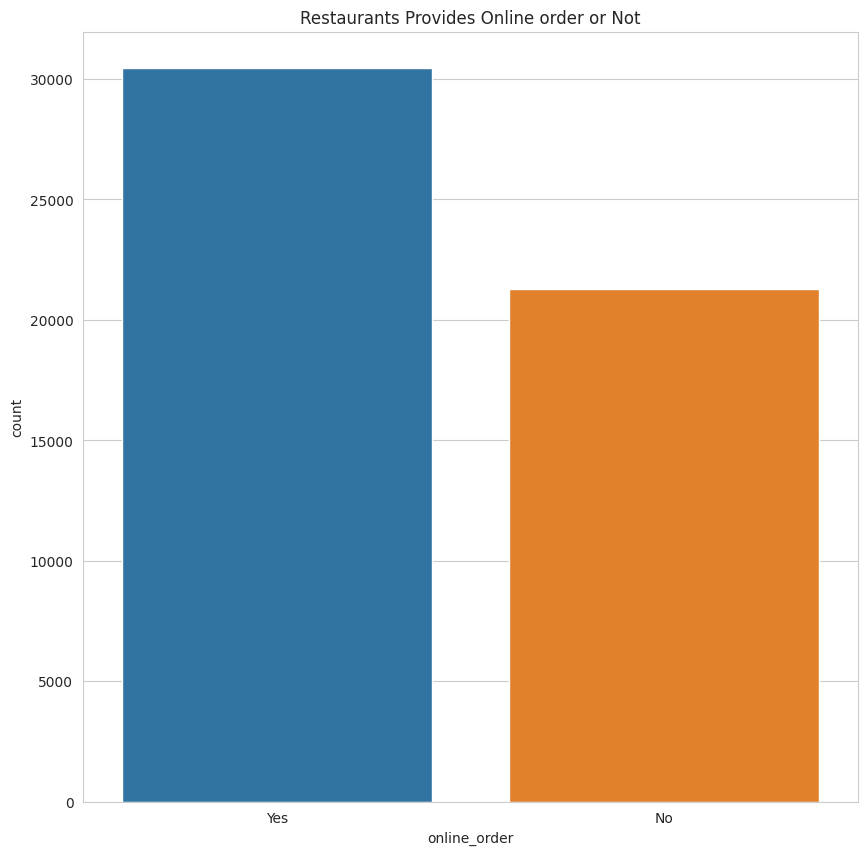

In [14]:
sns.countplot(data = df,x =df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants Provides Online order or Not')
plt.show()

In [15]:
df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [16]:
# Types of Meal 

df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

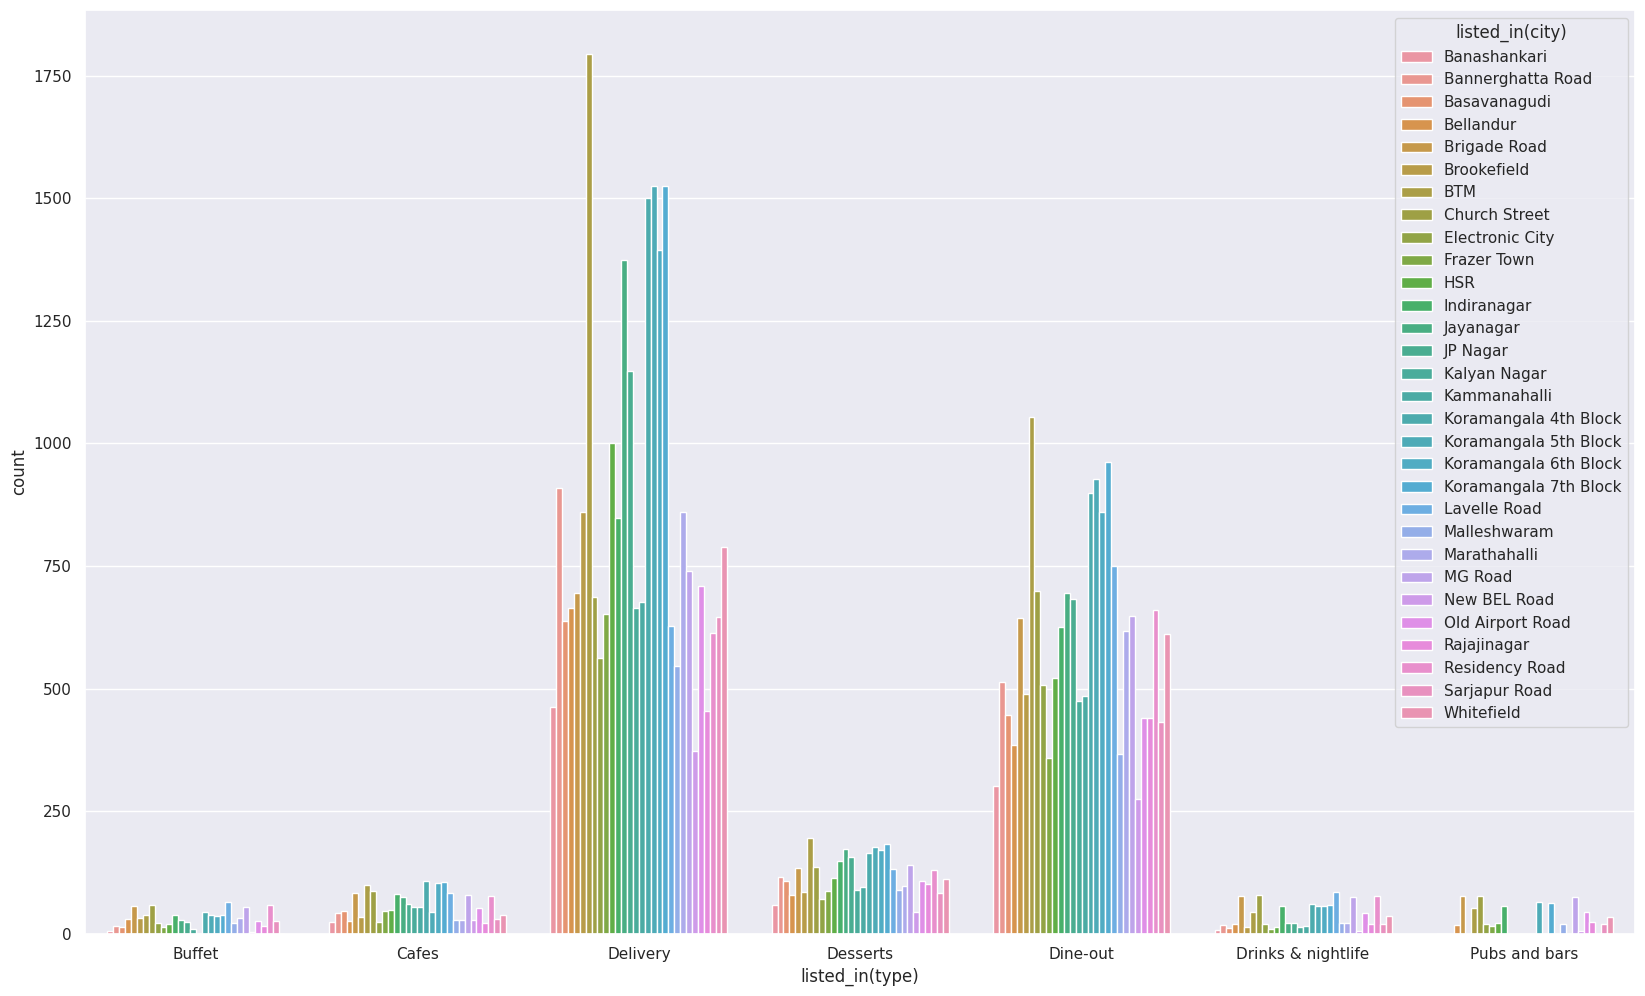

In [17]:
# Convert the categorical column to a string
df['listed_in(type)'] = df['listed_in(type)'].astype(str)

# Count the occurrences of 'type' values and normalize the counts
type_counts = df['listed_in(type)'].value_counts(normalize=True)

# Filter the DataFrame to include only necessary columns
filtered_df = df[['listed_in(type)', 'listed_in(city)']]

sns.set(font='DejaVu Sans') 
plt.figure(figsize=(20,12))
# Plot the normalized counts with split by 'city' using seaborn
sns.countplot(x='listed_in(type)', data=filtered_df, hue='listed_in(city)')

# Show the plot
plt.show()

In [18]:
df['rest_type'].nunique()

93

In [19]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

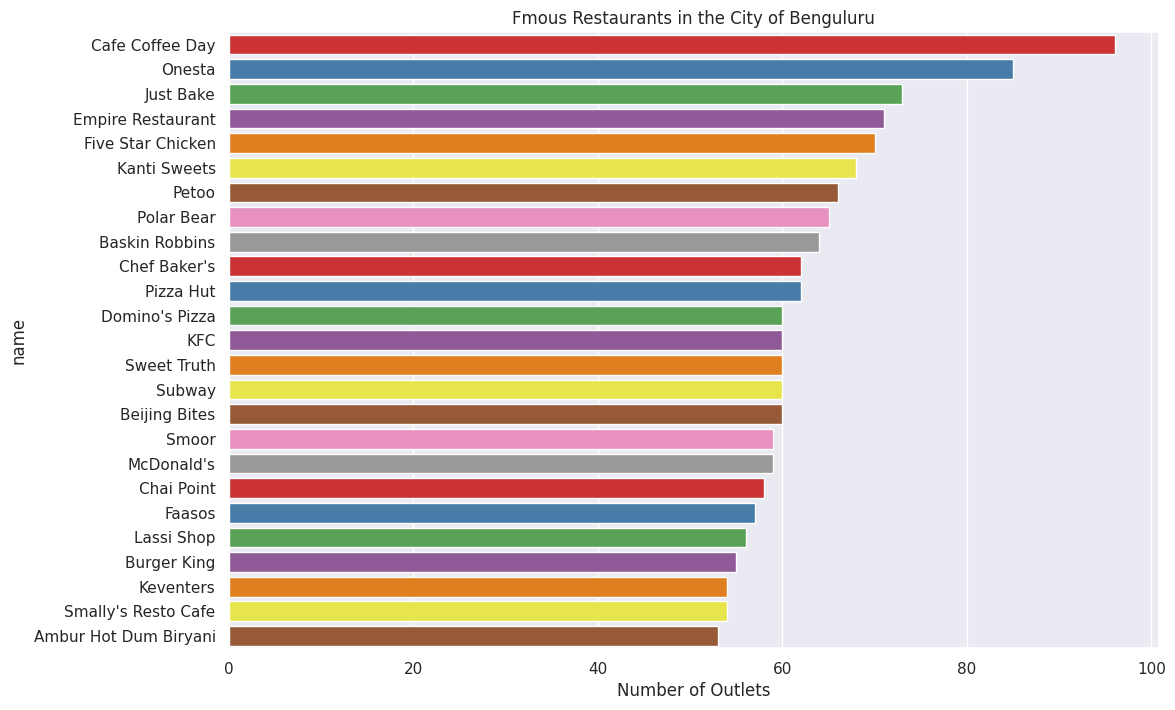

In [20]:
plt.figure(figsize=(12,8))
val = df['name'].value_counts()[:25]
sns.barplot(x=val,y=val.index,palette='Set1')
plt.title('Fmous Restaurants in the City of Benguluru')
plt.xlabel('Number of Outlets')
plt.show()

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
df.rate = df.rate.replace('NEW',np.nan)
df.dropna(how='any',inplace=True)

In [23]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
data = df 
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda x: x.replace('/5',''))
data['rate'] = data['rate'].apply(lambda x:float(x))


In [25]:
data.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

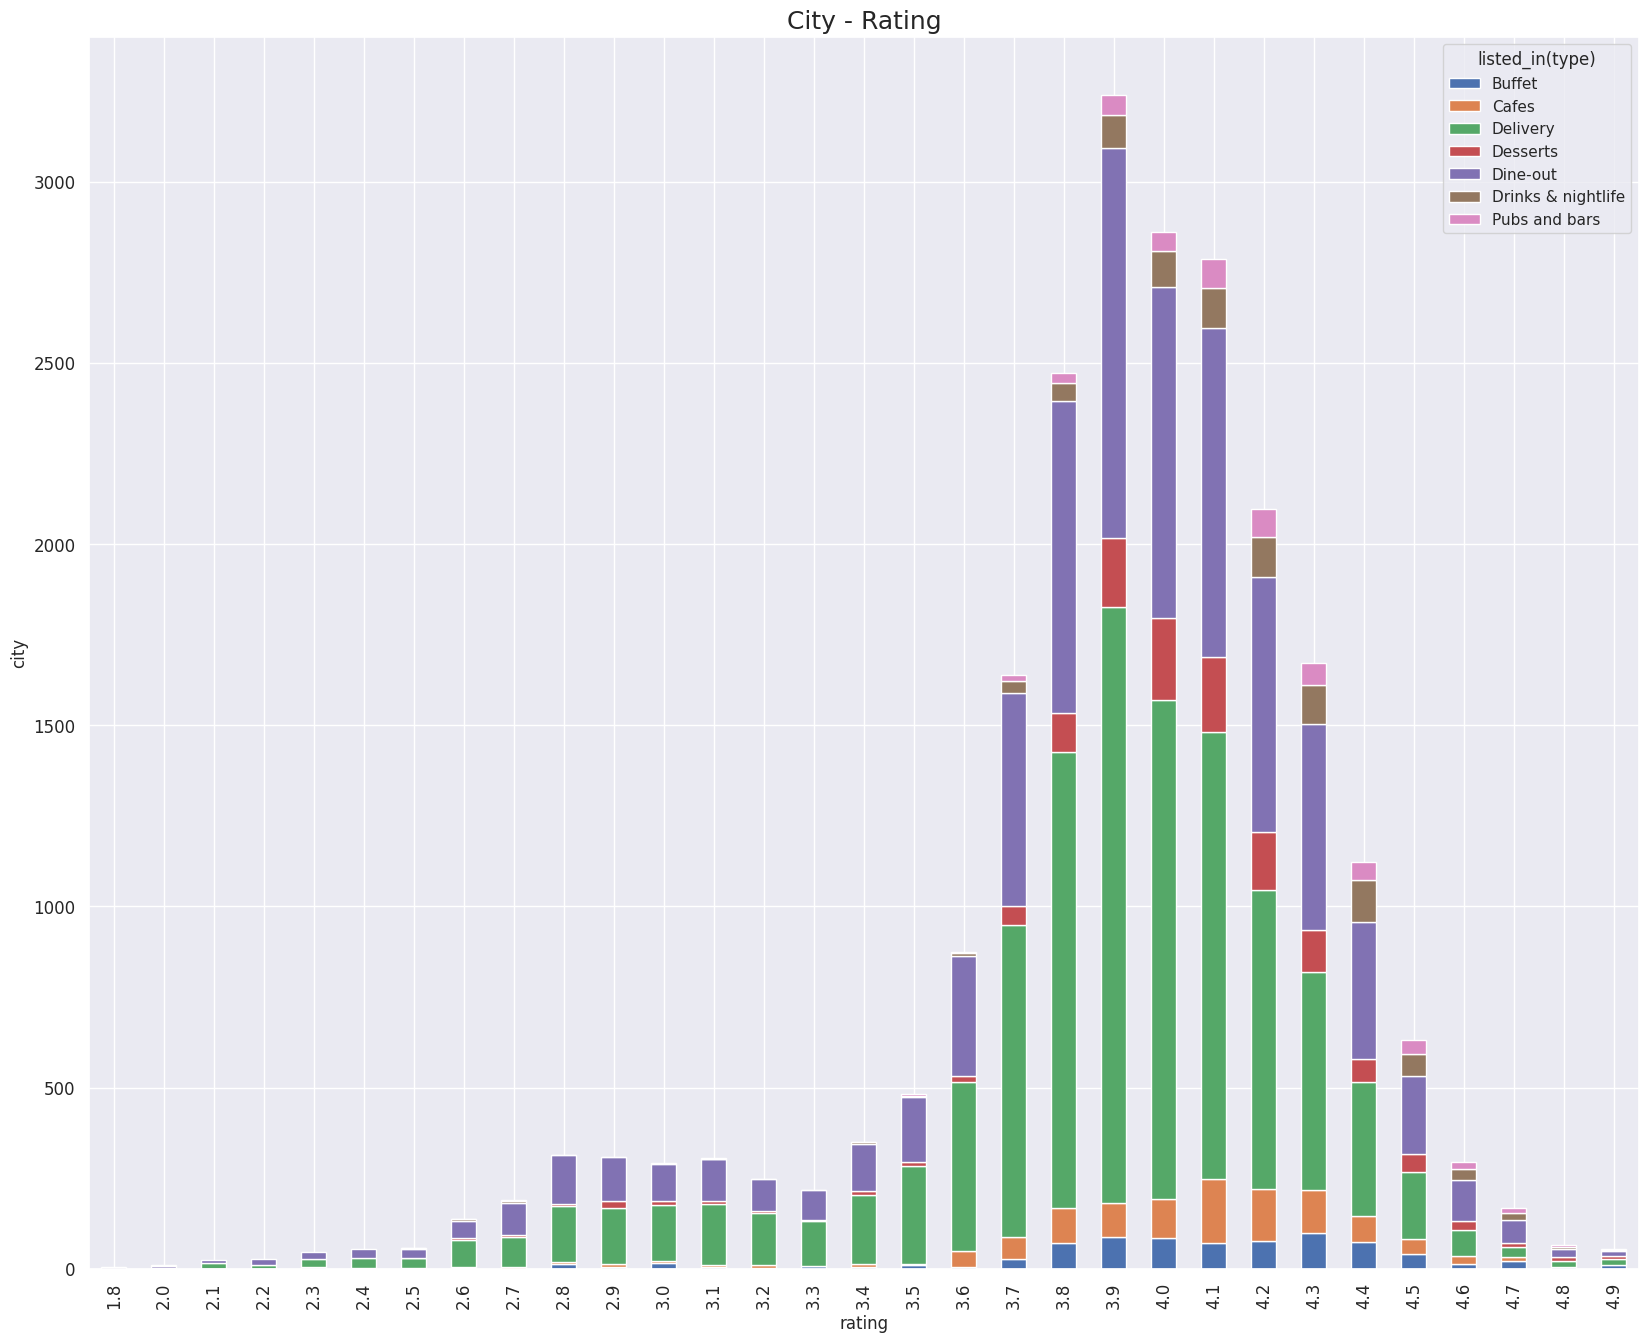

In [26]:
# Relation between rate and listed_in(type) Column

rel_type = pd.crosstab(df['rate'],df['listed_in(type)'])
rel_type.plot(kind='bar',stacked=True,figsize=(20,16))
plt.title('City - Rating',fontsize=18)
plt.ylabel('city',fontsize=12)
plt.xlabel('rating',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1200x800 with 0 Axes>

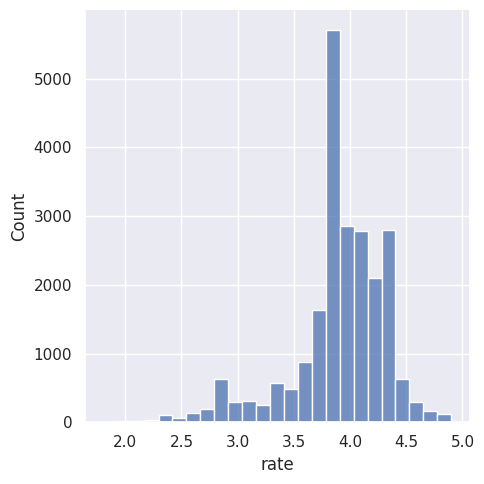

In [27]:
plt.figure(figsize=(12,8))
sns.displot(df['rate'],bins=25)
plt.show()

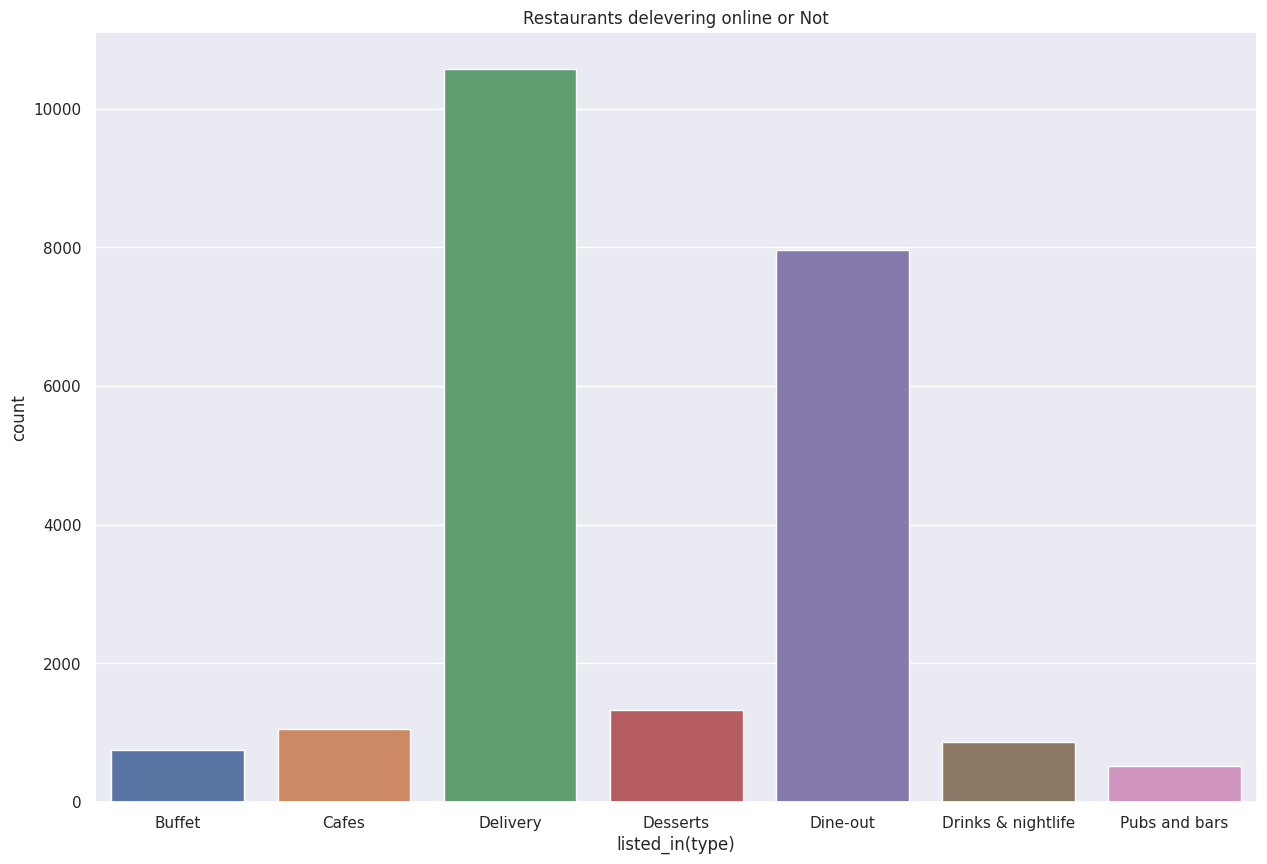

In [28]:
sns.countplot(data=df,x='listed_in(type)')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restaurants delevering online or Not')
plt.show()

In [29]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Jayanagar
3,Kumaraswamy Layout
4,Rajarajeshwari Nagar


In [30]:
import numpy as np
from geopy.geocoders import Nominatim
import pandas as pd

locations['Name'] = locations['Name'].apply(lambda x: 'Bangaluru ' + str(x))
lat_lon = []
geolocator = Nominatim(user_agent='app')

for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

locations['geo_loc'] = lat_lon
locations.to_csv('locations.csv', index=False)


In [31]:
locations['Name'] = locations['Name'].apply(lambda x : x.replace('Bangaluru','')[1:])

In [32]:
locations

,Name,geo_loc
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Jayanagar,"(12.9292731, 77.5824229)"
3,Kumaraswamy Layout,"(12.9081487, 77.5553179)"
4,Rajarajeshwari Nagar,"(12.9274413, 77.5155224)"
...,...,...
83,Sahakara Nagar,"(13.0621474, 77.58006135480495)"
84,Jalahalli,"(13.0464531, 77.5483803)"
85,Yelahanka,"(13.1006982, 77.5963454)"
86,Magadi Road,"(12.975608, 77.5553564)"


In [33]:
def generateBaseMap(default_location=[12.97,77.59],default_zoom_start=12):
  base_map = folium.Map(location=default_location,control_scale=True,zoom_start=default_zoom_start)
  return base_map

In [34]:
Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns = ['Name','count']
Rest_locations = Rest_locations.merge(locations, on='Name', how='left').dropna()


In [35]:
Rest_locations


,Name,count,geo_loc
0,Koramangala 5th Block,1760,"(12.9348429, 77.6189768)"
1,BTM,1446,"(12.911275849999999, 77.60456543431182)"
2,Indiranagar,1334,"(12.9732913, 77.6404672)"
3,HSR,1155,"(12.9116225, 77.6388622)"
4,Jayanagar,1030,"(12.9292731, 77.5824229)"
...,...,...,...
83,Yelahanka,2,"(13.1006982, 77.5963454)"
84,Kanakapura Road,2,"(12.8773096, 77.5449181)"
85,West Bangalore,2,"(12.9848519, 77.5400626)"
86,Rajarajeshwari Nagar,2,"(12.9274413, 77.5155224)"


In [36]:
lat,lon = zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat'] = lat
Rest_locations['lon'] = lon
basemap = generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)



In [37]:
basemap

# Building the model

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  object 
 1   address                      23046 non-null  object 
 2   name                         23046 non-null  object 
 3   online_order                 23046 non-null  object 
 4   book_table                   23046 non-null  object 
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  object 
 8   location                     23046 non-null  object 
 9   rest_type                    23046 non-null  object 
 10  dish_liked                   23046 non-null  object 
 11  cuisines                     23046 non-null  object 
 12  approx_cost(for two people)  23046 non-null  object 
 13  reviews_list         

In [39]:
df.online_order.replace(('Yes','No'),(True,False),inplace=True)
df.book_table.replace(('Yes','No'),(True,False),inplace=True)


In [40]:
def encode(df):
  for col in df.columns[~df.columns.isin(['rate','approx_cost(for two people)','votes'])]:
    df[col] = df[col].factorize()[0]
  return df

df_en = encode(df.copy()) 

In [41]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  object 
 13  reviews_list         

In [42]:
df_en.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,0,4.1,775,0,0,0,0,0,800,0,0,0,0
1,1,1,1,0,1,4.1,787,1,0,0,1,1,800,1,0,0,0
2,2,2,2,0,1,3.8,918,2,0,1,2,2,800,2,0,0,0
3,3,3,3,1,1,3.7,88,3,0,2,3,3,300,3,0,0,0
4,4,4,4,1,1,3.8,166,4,1,0,4,4,600,4,0,0,0


In [43]:
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].astype(str)
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].astype(float)


In [44]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  float64
 13  reviews_list         

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

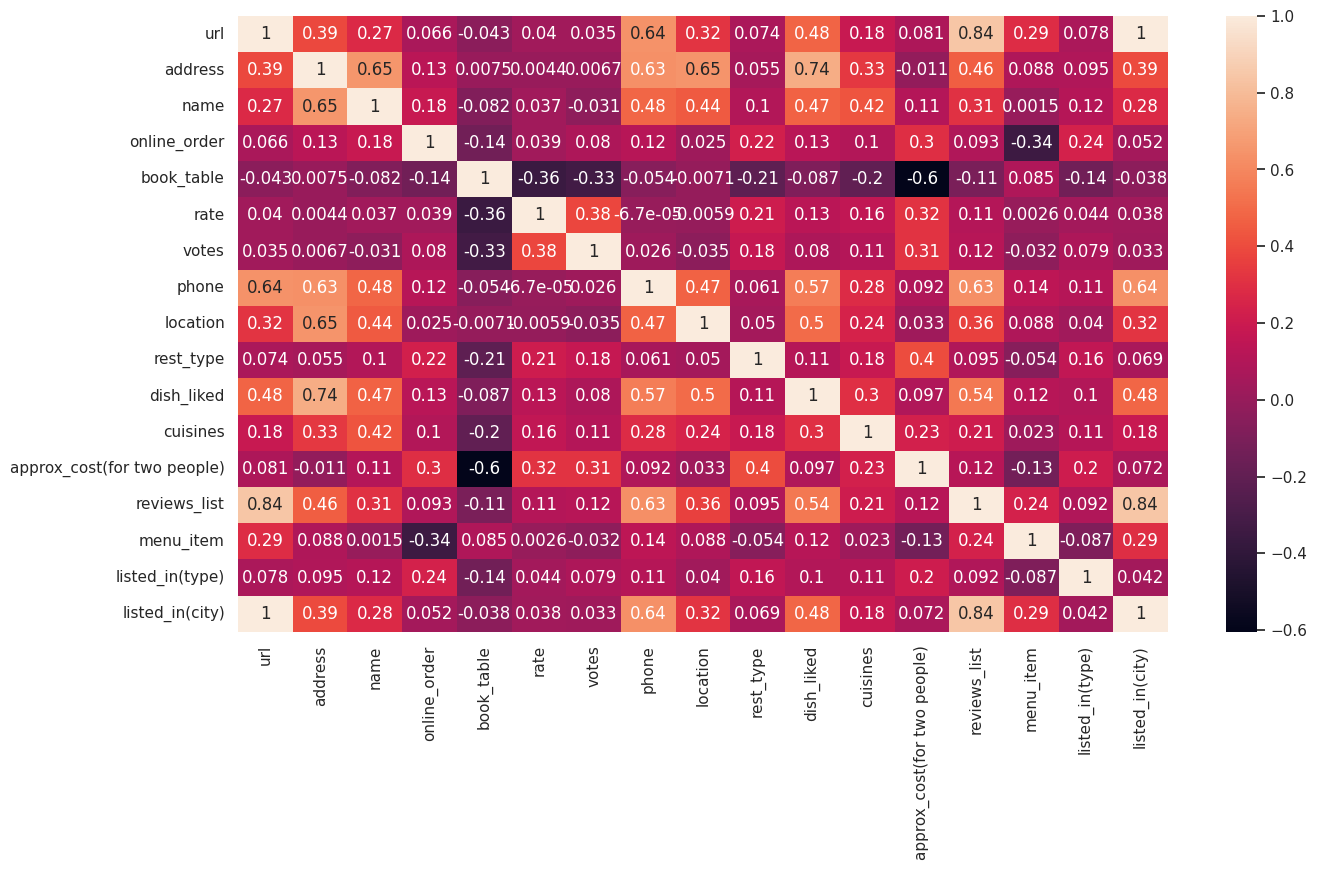

In [45]:
corr = df_en.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
df_en.columns

In [46]:
from sklearn.model_selection import train_test_split
X = df_en.drop('rate',axis=1)
y = df_en['rate']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [48]:
x_train.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49237,22122,934,835,0,1,61,6504,18,2,950,112,250.0,13328,0,2,28
1000,450,320,198,0,0,1428,379,10,0,316,211,800.0,370,138,2,1
32826,14538,2061,1712,0,1,44,4578,44,2,2106,957,550.0,8760,2833,2,18
5047,2066,1042,930,1,1,2635,1204,28,4,1070,9,600.0,1456,0,1,4
32775,14518,2257,1883,0,1,76,2572,13,2,2307,208,600.0,8750,3154,2,18


In [47]:
y_train.head()

49237    3.4
1000     4.2
32826    3.9
5047     4.3
32775    3.5
Name: rate, dtype: float64

In [50]:
x_test.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
26132,11316,3397,1408,0,0,389,4270,66,14,3715,1391,1300.0,7029,0,4,15
45814,20516,2823,666,0,0,3307,6165,22,0,4704,1213,1400.0,12444,0,4,25
3461,1383,26,27,0,1,5060,829,2,0,712,25,750.0,949,216,4,2
2821,1114,637,585,0,1,157,742,12,0,629,30,450.0,819,0,2,2
2479,911,383,361,0,0,612,667,11,15,376,244,1500.0,712,0,5,1


In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18436, 16), (4610, 16), (18436,), (4610,))

In [52]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
y_pred = reg_model.predict(x_test)

r2_score(y_test,y_pred)
                           

0.24277843247809194

In [ ]:
# !pip install catboost

In [ ]:
# !pip install ipywidgets

In [55]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(n_estimators=200,loss_function='MAE',eval_metric='RMSE')

cat_model.fit(x_train,y_train)
y_pred = cat_model.predict(x_test)
r2_score(y_test,y_pred)

0:	learn: 0.4345988	total: 55.9ms	remaining: 11.1s
1:	learn: 0.4314438	total: 62.7ms	remaining: 6.21s
2:	learn: 0.4283234	total: 69.1ms	remaining: 4.54s
3:	learn: 0.4256549	total: 75.4ms	remaining: 3.69s
4:	learn: 0.4234332	total: 81.5ms	remaining: 3.18s
5:	learn: 0.4206039	total: 87.9ms	remaining: 2.84s
6:	learn: 0.4181069	total: 96.5ms	remaining: 2.66s
7:	learn: 0.4158431	total: 103ms	remaining: 2.47s
8:	learn: 0.4137619	total: 109ms	remaining: 2.31s
9:	learn: 0.4114405	total: 115ms	remaining: 2.19s
10:	learn: 0.4093763	total: 121ms	remaining: 2.08s
11:	learn: 0.4073495	total: 128ms	remaining: 2s
12:	learn: 0.4051568	total: 135ms	remaining: 1.94s
13:	learn: 0.4032915	total: 141ms	remaining: 1.87s
14:	learn: 0.4015795	total: 148ms	remaining: 1.82s
15:	learn: 0.3999673	total: 154ms	remaining: 1.76s
16:	learn: 0.3984126	total: 160ms	remaining: 1.72s
17:	learn: 0.3969388	total: 166ms	remaining: 1.68s
18:	learn: 0.3953082	total: 172ms	remaining: 1.64s
19:	learn: 0.3940302	total: 178ms	rem

0.3490382484325508

In [58]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)

r2_score(y_test,y_pred)

0.8879099002025526

In [59]:
from sklearn.tree import DecisionTreeRegressor
DT_model =DecisionTreeRegressor()

DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)

r2_score(y_test,y_pred)

0.8167937509670802

In [ ]:
# CONCLUSION (The Random Forest model is best for this case)